In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 1.라이브러리 및 데이터 로드

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (12,8)  #시각화 figure default 설정
mpl.rcParams['font.family'] = 'NanumGothic' #폰트 디폴트 설정
mpl.rcParams['font.size'] = 10    #폰트 사이즈 디폴트 설정
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [3]:
import os
os.listdir()

['.config', '최종파일0503.csv', 'sample_data']

In [4]:
df = pd.read_csv('최종파일0503.csv')

In [5]:
round(df["전기차충전기유무"].value_counts() / df.shape[0] * 100, 2)

0    87.95
1    12.05
Name: 전기차충전기유무, dtype: float64

In [6]:
df

,fid,id,left,top,right,bottom,관광여가오락수,교육수,부동산수,생활서비스수,...,병원수,어린이집수,학교수,주차장주차면수,전기차충전기수,급속충전기수,완속충전기수,전기차충전기유무,급속충전기유무,완속충전기유무
0,1,790,206153.585523,449218.165378,206253.585523,449118.165378,0,0,0,3,...,0,0,0,32.0,0,0,0,0,0,0
1,2,791,206153.585523,449118.165378,206253.585523,449018.165378,7,0,0,3,...,0,0,0,140.0,0,0,0,0,0,0
2,3,788,206153.585523,449418.165378,206253.585523,449318.165378,4,3,1,5,...,4,1,0,42.0,0,0,0,0,0,0
3,4,789,206153.585523,449318.165378,206253.585523,449218.165378,1,0,1,4,...,0,0,0,40.0,0,0,0,0,0,0
4,5,786,206153.585523,449618.165378,206253.585523,449518.165378,0,1,2,5,...,0,0,0,35.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1925,780,206153.585523,450218.165378,206253.585523,450118.165378,1,0,0,3,...,0,2,0,0.0,0,0,0,0,0,0
1091,1927,781,206153.585523,450118.165378,206253.585523,450018.165378,1,5,0,3,...,5,0,0,0.0,0,0,0,0,0,0
1092,1929,778,206153.585523,450418.165378,206253.585523,450318.165378,0,0,0,2,...,0,2,0,0.0,0,0,0,0,0,0
1093,1931,779,206153.585523,450318.165378,206253.585523,450218.165378,0,0,2,3,...,0,0,0,0.0,0,0,0,0,0,0


# 2.Hyperparameter Tuning

In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# !pip install catboost
# from catboost import CatBoostClassifier

import os
import random

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, label_ranking_average_precision_score

In [8]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(100) # Seed 고정

In [9]:
# df.head(3)

In [10]:
df.columns

Index(['fid', 'id', 'left', 'top', 'right', 'bottom', '관광여가오락수', '교육수', '부동산수',
       '생활서비스수', '소매수', '숙박수', '스포츠수', '음식수', '총건물수', '승차총승객수', '하차총승객수',
       '대지면적', '단독건물수', '건물면적', '공동건축물수', '60대총인구수', '50대총인구수', '40대총인구수',
       '30대총인구수', '20대총인구수', '총인구대비남성비율', '총인구대비여성비율', '생산가능인구남성비율',
       '생산가능인구여성비율', '인구당전기차수', '병원수', '어린이집수', '학교수', '주차장주차면수', '전기차충전기수',
       '급속충전기수', '완속충전기수', '전기차충전기유무', '급속충전기유무', '완속충전기유무'],
      dtype='object')

In [11]:
df = df.fillna(0)

In [12]:
X = df.loc[:,'관광여가오락수':'주차장주차면수']
y = df['전기차충전기유무']

In [13]:
y.value_counts()

0    963
1    132
Name: 전기차충전기유무, dtype: int64

In [14]:
#  predictions = clf.predict(X_test)
# >>> cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
# >>> disp = ConfusionMatrixDisplay(confusion_matrix=cm,
# ...                               display_labels=clf.classes_)

## 3.0 RandomforestClassifier

In [15]:
# rf_best_trial = {'n_estimators': 544,
#                               'max_depth' : 18,
#                               'min_samples_split': 4,
#                               'min_samples_leaf': 1,
#                               'max_features': 'log2'}

In [16]:
rfc = RandomForestClassifier(random_state = 100,
                             n_estimators = 1000,
                             class_weight= "balanced")

params = {"criterion" :  ["gini"],
          "min_samples_leaf" : [1]}

gs_rfc = GridSearchCV(estimator = rfc,
                      param_grid = params,
                      scoring = 'accuracy',
                      refit = True,
                      n_jobs = -1,
                      verbose = True)

gs_rfc.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=1000,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1]},
             scoring='accuracy', verbose=True)

In [17]:
print(gs_rfc.best_score_)
print(gs_rfc.best_params_)
randomforest = gs_rfc.best_estimator_

0.8831050228310502
{'criterion': 'gini', 'min_samples_leaf': 1}


<Axes: xlabel='피처', ylabel='중요도'>

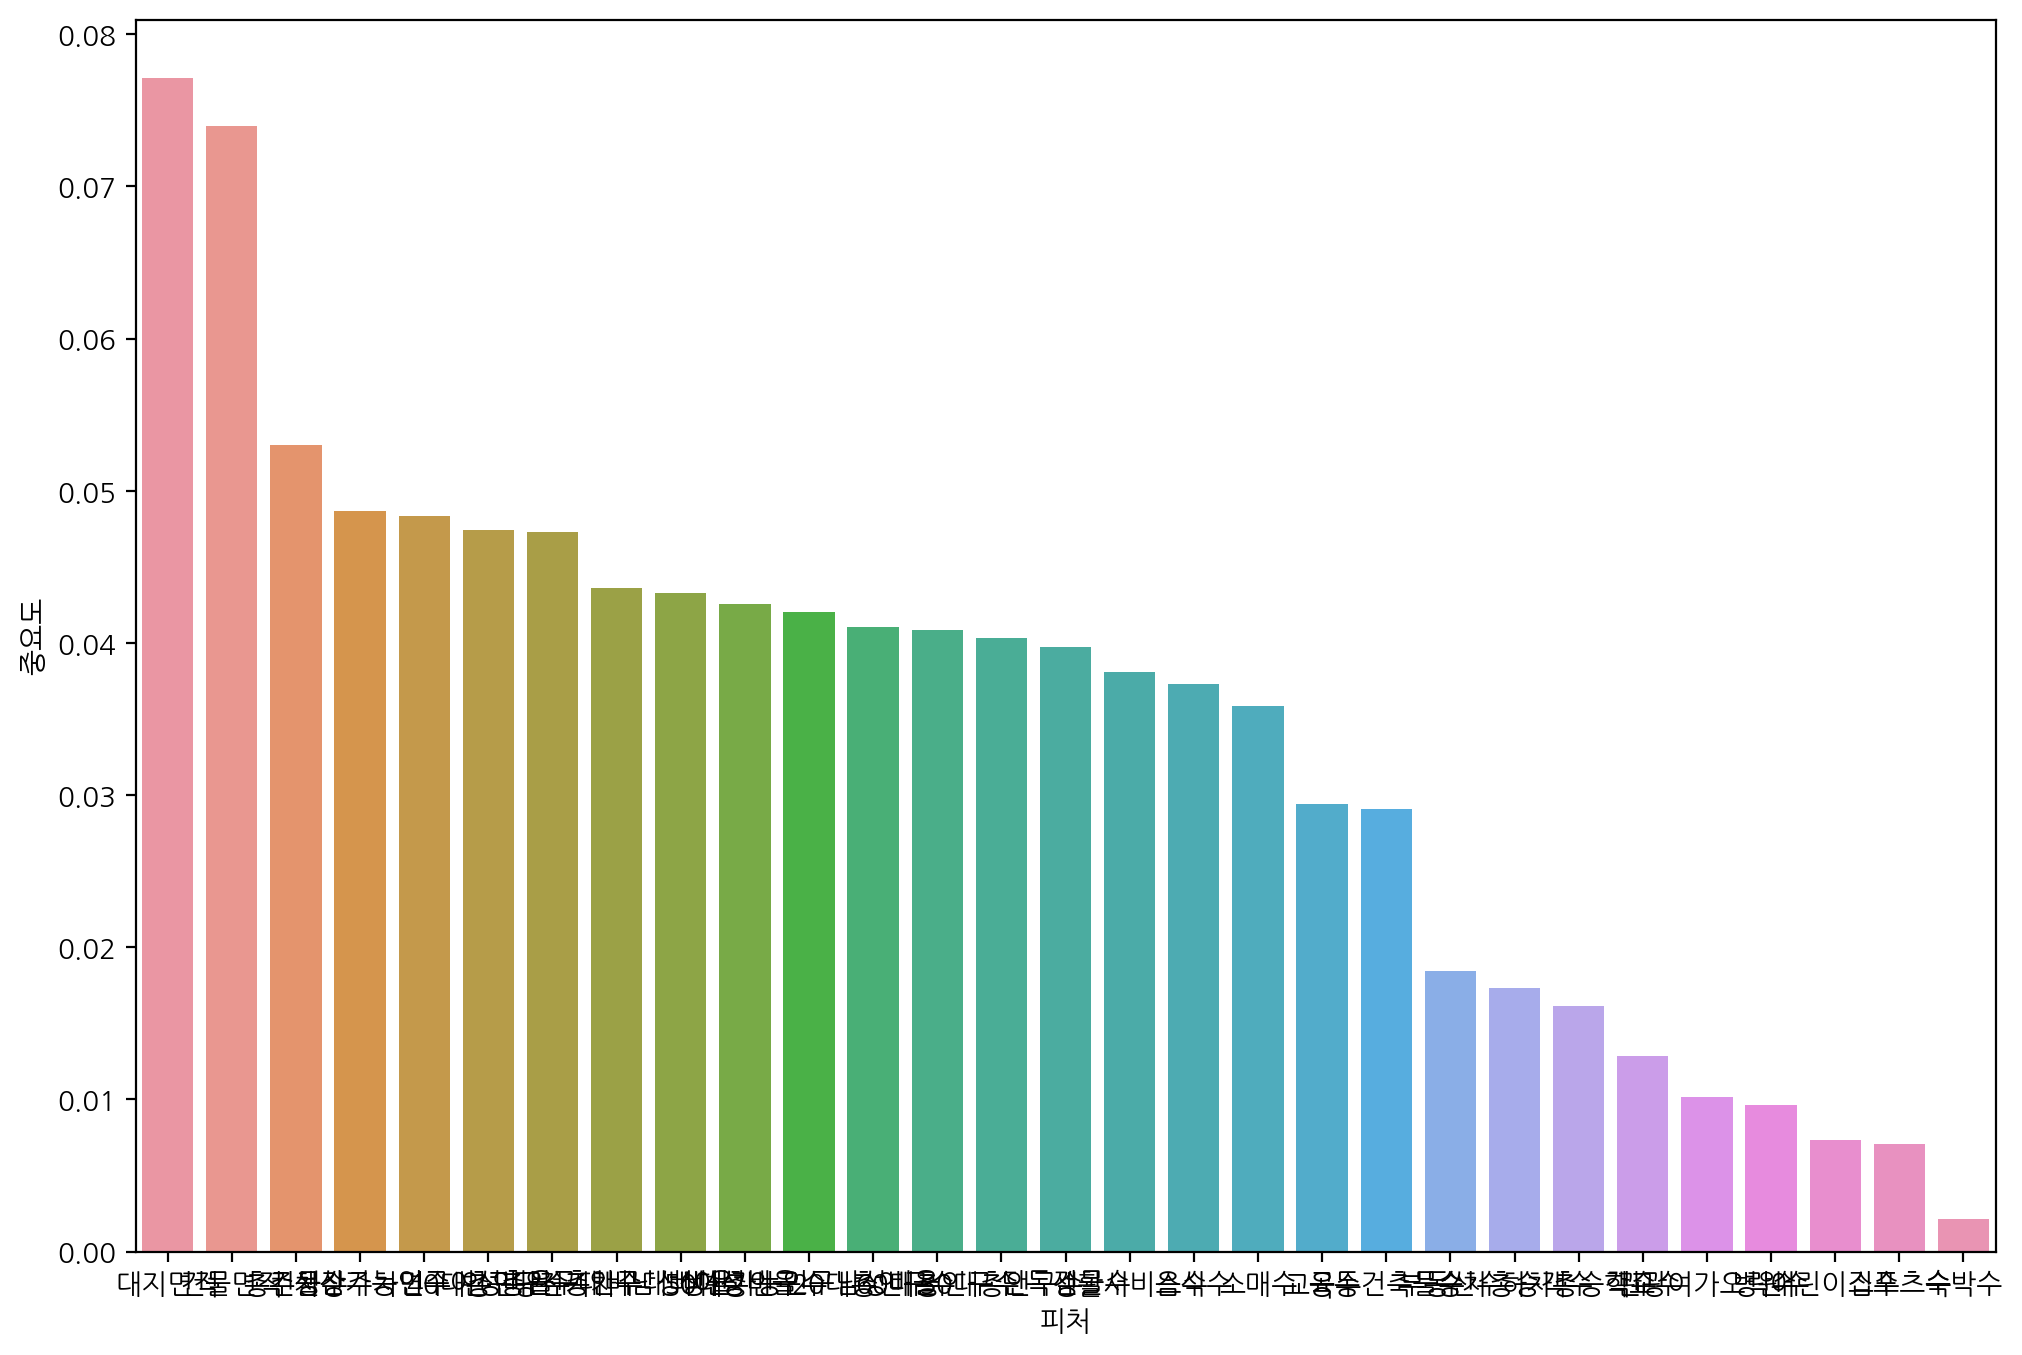

In [18]:
rfc_imp = pd.DataFrame({"피처" : gs_rfc.feature_names_in_, "중요도" : gs_rfc.best_estimator_.feature_importances_}).sort_values('중요도', ascending = False)
sns.barplot(data = rfc_imp, x = "피처", y = "중요도")

## 3.1XGBClassifier

In [ ]:
# xgb_best_trial = {'n_estimators':846,
#                   'max_depth': 12,
#                   'learning_rate': 0.01652099974315352,
#                   'subsample': 0.7695036113319597,
#                   'colsample_tree': 0.5172270242999701
#                  }

In [ ]:
xgb = XGBClassifier(random_state = 100, 
                    n_estimators = 1000)

params = {"learning_rate" : [0.1],
          "max_depth" :  [10],
          "subsample" : [0.7]}

gs_xgb = GridSearchCV(estimator = xgb,
                      param_grid = params,
                      scoring = 'accuracy',
                      refit = True,
                      n_jobs = -1,
                      verbose = True)

gs_xgb.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [10],
                         'subsample': [0.7]},
             scoring='accuracy', verbose=True)

In [ ]:
print(gs_xgb.best_score_)
print(gs_xgb.best_params_)
xgboost = gs_xgb.best_estimator_

0.8657534246575344
{'learning_rate': 0.1, 'max_depth': 10, 'subsample': 0.7}


## 3.2LGBMClassifier

In [ ]:
# lgbm_best_trial = {'num_leaves': 47, 
#                    'learning_rate': 0.33885827994235074,
#                    'feature_fraction': 0.44979163799469957, 
#                    'bagging_fraction': 0.779075858151732,
#                    'bagging_freq': 7, 
#                    'min_child_samples': 21,
#                    'lambda_l1': 0.001335240606997952,
#                    'lambda_l2': 0.0096217812562204}

In [ ]:
lgb = LGBMClassifier(random_state = 100,
                    n_estimators = 1000)

params = {"learning_rate" : [0.1],
          "max_depth" :  [10],
          "subsample" : [0.3]}

gs_lgb = GridSearchCV(estimator = lgb,
                      param_grid = params,
                      scoring = 'accuracy',
                      n_jobs = -1,
                      verbose = True)

gs_lgb.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=LGBMClassifier(n_estimators=1000, random_state=100),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [10],
                         'subsample': [0.3]},
             scoring='accuracy', verbose=True)

In [ ]:
print(gs_lgb.best_score_)
print(gs_lgb.best_params_)
lgbm = gs_lgb.best_estimator_

0.8657534246575344
{'learning_rate': 0.1, 'max_depth': 10, 'subsample': 0.3}


## 3.3GradientBoosting


In [ ]:
gb = GradientBoostingClassifier(random_state = 100,
                                n_estimators= 1000)

params = {"learning_rate" : [0.3],
          "max_depth" :  [17],
          "subsample" : [0.9]}

gs_gb = RandomizedSearchCV(estimator = gb,
                            param_distributions= params,
                            n_iter = 20,
                            cv = 5,
                            scoring = 'accuracy',
                            n_jobs = -1,
                            verbose = True)

gs_gb.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(n_estimators=1000,
                                                        random_state=100),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.3],
                                        'max_depth': [17], 'subsample': [0.9]},
                   scoring='accuracy', verbose=True)

In [ ]:
print(gs_gb.best_score_)
print(gs_gb.best_params_)
gradientboosting = gs_gb.best_estimator_

0.8721461187214612
{'subsample': 0.9, 'max_depth': 17, 'learning_rate': 0.3}


# 3.Oversampling with SMOTE

In [ ]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# SMOTE 객체
sm = SMOTE(random_state = 100)

# oversampling
X_resampled, y_resampled = sm.fit_resample(X, y)

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape))

print('Before OverSampling, counts of label "1": {}'.format(sum(y==1)))
print('Before OverSampling, counts of label "0": {} \n'.format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

Before OverSampling, the shape of train_X: (1095, 29)
Before OverSampling, the shape of train_y: (1095,) 

Before OverSampling, counts of label "1": 132
Before OverSampling, counts of label "0": 963 

After OverSampling, the shape of train_X: (1926, 29)
After OverSampling, the shape of train_y: (1926,) 

After OverSampling, counts of label '1': 963
After OverSampling, counts of label '0': 963


In [ ]:
def oversampling(X, y):
    # SMOTE 객체
    sm = SMOTE(random_state = 100)

    # oversampling
    X_rs, y_rs = sm.fit_resample(X, y)

    return X_rs, y_rs

# 4.Stratified KFold 학습 

In [ ]:
def stratified_learn(classification_models, num_split, random_state = 100):
    #df_total 데이터프레임 생성
    df_total = pd.DataFrame({"인덱스": range(0,1095)})

    #각 모델별로 stratified k-fold 학습 및 예측 수행
    for model in classification_models:

        # StratifiedKFold 지정
        skf = StratifiedKFold(n_splits = num_split, shuffle = True, random_state = random_state)
        idx_list = []
        proba_list = []

        for i, (train_index, test_index) in enumerate(skf.split(X, y)):
            X_train, y_train = X.iloc[train_index], y.iloc[train_index]
            X_test, y_test = X.iloc[test_index], y.iloc[test_index]

            #Oversampling작업
            X_train_rs, y_train_rs = oversampling(X_train, y_train)
            
            #모델 학습 및 확률값 예측
            model.fit(X_train_rs, y_train_rs)          
            proba = model.predict_proba(X_test)[:,1]

            #test_index, proba값을 각각 리스트에 추가
            idx_list.extend(test_index)
            proba_list.extend(proba)
            
            print(f"\n{model.__class__.__name__}의{i+1}번째 fold 예측 완료")

        df_model = pd.DataFrame({"인덱스": idx_list,
                                 f"{model.__class__.__name__}의 P(y=1)": proba_list})

        df_total = pd.merge(df_total, df_model, how = 'inner', on = '인덱스') 
            
        print(f"\n{model.__class__.__name__}의 데이터프레임 생성 완료")

    df_total = df_total.sort_values("인덱스").set_index("인덱스")
    df_total["평균 P(y=1)의 확률"] = df_total.mean(axis = 1)
    print("\n최종 데이터프레임 생성 완료")

    return df_total   

In [ ]:
# pd.DataFrame({"피처" : xgboost.feature_names_in_, "중요도" : xgboost.feature_importances_}).sort_values('중요도', ascending = False)



In [ ]:
#stratified_learn함수 정의

def stratified_learn(classification_models, num_split, params, random_state = 100):
    #전체 데이터프레임 생성
    df_total = pd.DataFrame({"인덱스": range(0,1095)})

    #각 모델별로 stratified k-fold 학습 및 예측 수행
    for model in classification_models:
        # StratifiedKFold
        skf = StratifiedKFold(n_splits = num_split, shuffle = True, random_state = random_state)
        idx_list = []
        proba_list = []

        for i, (train_index, test_index) in enumerate(skf.split(X, y)):
            X_train, y_train = X.iloc[train_index], y.iloc[train_index]
            X_test, y_test = X.iloc[test_index], y.iloc[test_index]

            #Oversampling작업
            X_train_rs, y_train_rs = oversampling(X_train, y_train)

            #파라미터 튜닝
            ##############
                      
            gs = RandomizedSearchCV(estimator = model,
                                    param_distributions = params,
                                    scoring = 'accuracy',
                                    n_jobs = -1,
                                    n_iter = 10,
                                    cv = 3,
                                    random_state = 100,
                                    verbose = True)
            
            gs.fit(X_train_rs, y_train_rs)
            best_model = gs.best_estimator_
            
            #XGBClassifier 학습 및 확률값 예측
            # model.fit(X_train_rs, y_train_rs)
            # model.fit(X_train, y_train)            
            proba = best_model.predict_proba(X_test)[:,1]

            #test_index, proba를 리스트에 추가
            idx_list.extend(test_index)
            proba_list.extend(proba)
            
            print(f"\n{model.__class__.__name__}의{i+1}번째 fold 예측 완료")
            print("인덱스 개수", len(idx_list), "예측값 수", len(proba_list))

        df_model = pd.DataFrame({"인덱스": idx_list,
                                 f"{model.__class__.__name__}의 P(y=1)": proba_list})
        # print(df_model)
        df_total = pd.merge(df_total, df_model, how = 'inner', on = '인덱스')
            
        print(f"\n{model.__class__.__name__}의 데이터프레임 생성 완료")

    df_total = df_total.sort_values("인덱스").set_index("인덱스")
    df_total["평균 P(y=1)의 확률"] = df_total.mean(axis = 1)
    print("\n최종 데이터프레임 생성 완료")

    return df_total   

In [ ]:
# 분류 모델 리스트

params = {"learning_rate" : [0.1, 0.3, 0.5, 0.7],
          "max_depth" :  [15, 20, 25, 30, 35],
          "min_samples_leaf" : [1, 2, 3, 4, 5],
          "subsample" : [0.1, 0.3, 0.5, 0.7, 0.9]}

# randomforest = RandomForestClassifier(random_state = 100,
#                                       n_estimators = 1000)

xgboost = XGBClassifier(random_state = 100,
                        n_estimators = 1000)

lgbm = LGBMClassifier(random_state = 100,
                      n_estimators = 1000)

gradientboosting = GradientBoostingClassifier(random_state = 100,
                                              n_estimators = 1000)

classification_models = [xgboost, lgbm, gradientboosting]
df_total = stratified_learn(classification_models, params = params, num_split = 3, random_state = 100)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[01:48:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.


XGBClassifier의1번째 fold 예측 완료
인덱스 개수 365 예측값 수 365
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[01:49:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.


XGBClassifier의2번째 fold 예측 완료
인덱스 개수 730 예측값 수 730
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[01:49:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.


XGBClassifier의3번째 fold 예측 완료
인덱스 개수 1095 예측값 수 1095

XGBClassifier의 데이터프레임 생성 완료
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1

LGBMClassifier의1번째 fold 예측 완료
인덱스 개수 365 예측값 수 365
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] min_data_in_le

In [ ]:
df_total

,XGBClassifier의 P(y=1),LGBMClassifier의 P(y=1),GradientBoostingClassifier의 P(y=1),평균 P(y=1)의 확률
인덱스,,,,
0,0.2627229,0.1732811,0.0062021,0.1474020
1,0.0004185,0.0000000,0.0000000,0.0001395
2,0.0049451,0.0000003,0.0001046,0.0016833
3,0.0975165,0.0121230,0.0030137,0.0375510
4,0.0004259,0.0000000,0.0000000,0.0001420
...,...,...,...,...
1090,0.0079983,0.0001760,0.0000246,0.0027330
1091,0.0228828,0.0000136,0.0007055,0.0078673
1092,0.0019579,0.0000004,0.0000000,0.0006528


In [ ]:
pd.options.display.float_format = '{:.7f}'.format
df_total.sort_values("XGBClassifier의 P(y=1)", ascending = False)

,XGBClassifier의 P(y=1),LGBMClassifier의 P(y=1),GradientBoostingClassifier의 P(y=1),평균 P(y=1)의 확률
인덱스,,,,
283,0.9993703,0.9999927,0.9999997,0.9997876
1002,0.9990103,0.9999888,0.9999739,0.9996577
86,0.9989367,0.9999990,0.9840775,0.9943377
623,0.9987090,0.9999388,0.9999998,0.9995492
113,0.9984774,0.9999731,0.9999999,0.9994835
...,...,...,...,...
331,0.0000260,0.0000000,0.0000000,0.0000087
376,0.0000239,0.0000000,0.0000000,0.0000080
887,0.0000156,0.0000000,0.0000000,0.0000052


In [ ]:
df_total.corr()

,XGBClassifier의 P(y=1),LGBMClassifier의 P(y=1),GradientBoostingClassifier의 P(y=1),평균 P(y=1)의 확률
XGBClassifier의 P(y=1),1.0000000,0.8828513,0.7725820,0.9492337
LGBMClassifier의 P(y=1),0.8828513,1.0000000,0.7394076,0.9397544
GradientBoostingClassifier의 P(y=1),0.7725820,0.7394076,1.0000000,0.9019428
평균 P(y=1)의 확률,0.9492337,0.9397544,0.9019428,1.0000000


In [ ]:
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(3,1))
px.box(df_total["평균 P(y=1)의 확률"])

<Figure size 300x100 with 0 Axes>

In [ ]:
df_total[df_total["평균 P(y=1)의 확률"]>0.5].shape

(113, 4)

In [ ]:
df["전기차충전기유무"].value_counts() / df.shape[0]

0   0.8794521
1   0.1205479
Name: 전기차충전기유무, dtype: float64

f1값: 0.254071661237785


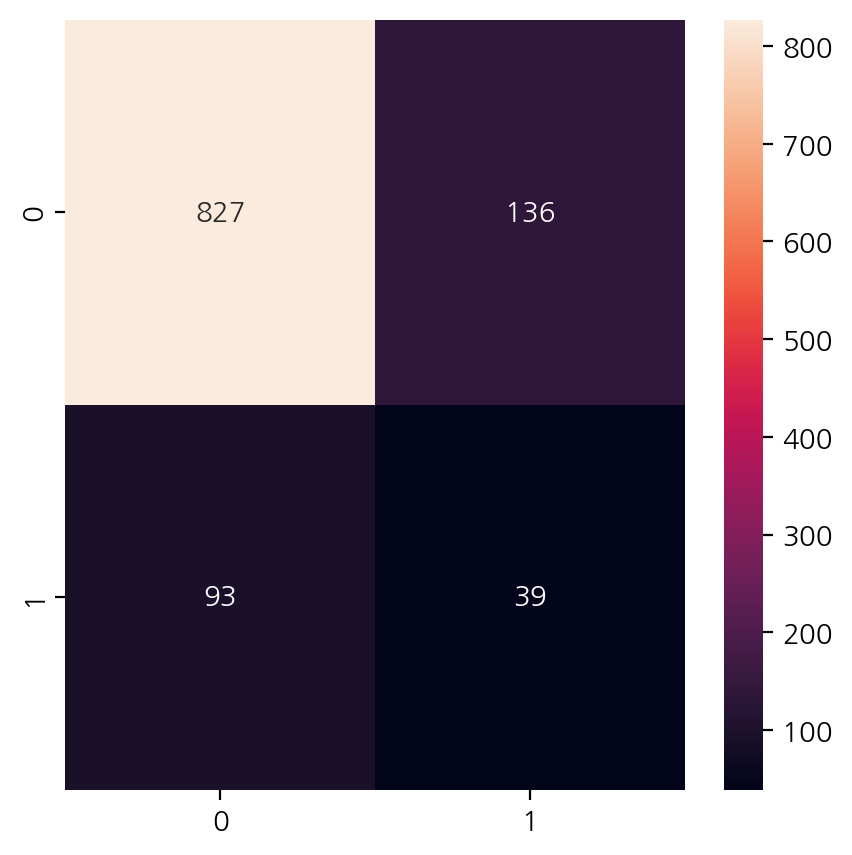

In [ ]:
threshold = 0.1
prediction = np.where(df_total["평균 P(y=1)의 확률"] > threshold, 1, 0)
print("f1값:", f1_score(y, prediction))
plt.figure(figsize = (5,5))
cm_matrix = confusion_matrix(y, prediction, labels= [0,1])
sns.heatmap(cm_matrix, annot=True, fmt = 'd')
plt.show()

In [ ]:
threshold_list = np.arange(0.1, 0.7, 10)
f1_list = []
for thres in threshold_list:
    prediction = np.where(df_total["평균 P(y=1)의 확률"] > thres, 1, 0)
    f1_list.append(f1_score(y, prediction))
    # print("f1값:", f1_score(y, prediction))



In [ ]:
feature_imp = pd.DataFrame({"feature":xgboost.feature_names_in_,
                            "randomforest중요도" :randomforest.feature_importances_,
                            "xgboost중요도" :xgboost.feature_importances_,
                            "lgbm중요도" :lgbm.feature_importances_})

In [ ]:
feature_imp

,feature,randomforest중요도,xgboost중요도,lgbm중요도
0,관광여가오락수,0.0144487,0.0728530,140
1,교육수,0.0352616,0.0504756,311
2,부동산수,0.0124260,0.0217585,166
3,생활서비스수,0.0287850,0.0220589,704
4,소매수,0.0359609,0.0264767,544
5,숙박수,0.0020112,0.0302166,1
6,스포츠수,0.0080256,0.0536497,82
7,음식수,0.0346605,0.0202134,741
8,총건물수,0.0438675,0.0205276,895
9,승차총승객수,0.0178843,0.0399515,372


In [ ]:
from sklearn.metrics import precision_score, recall_score

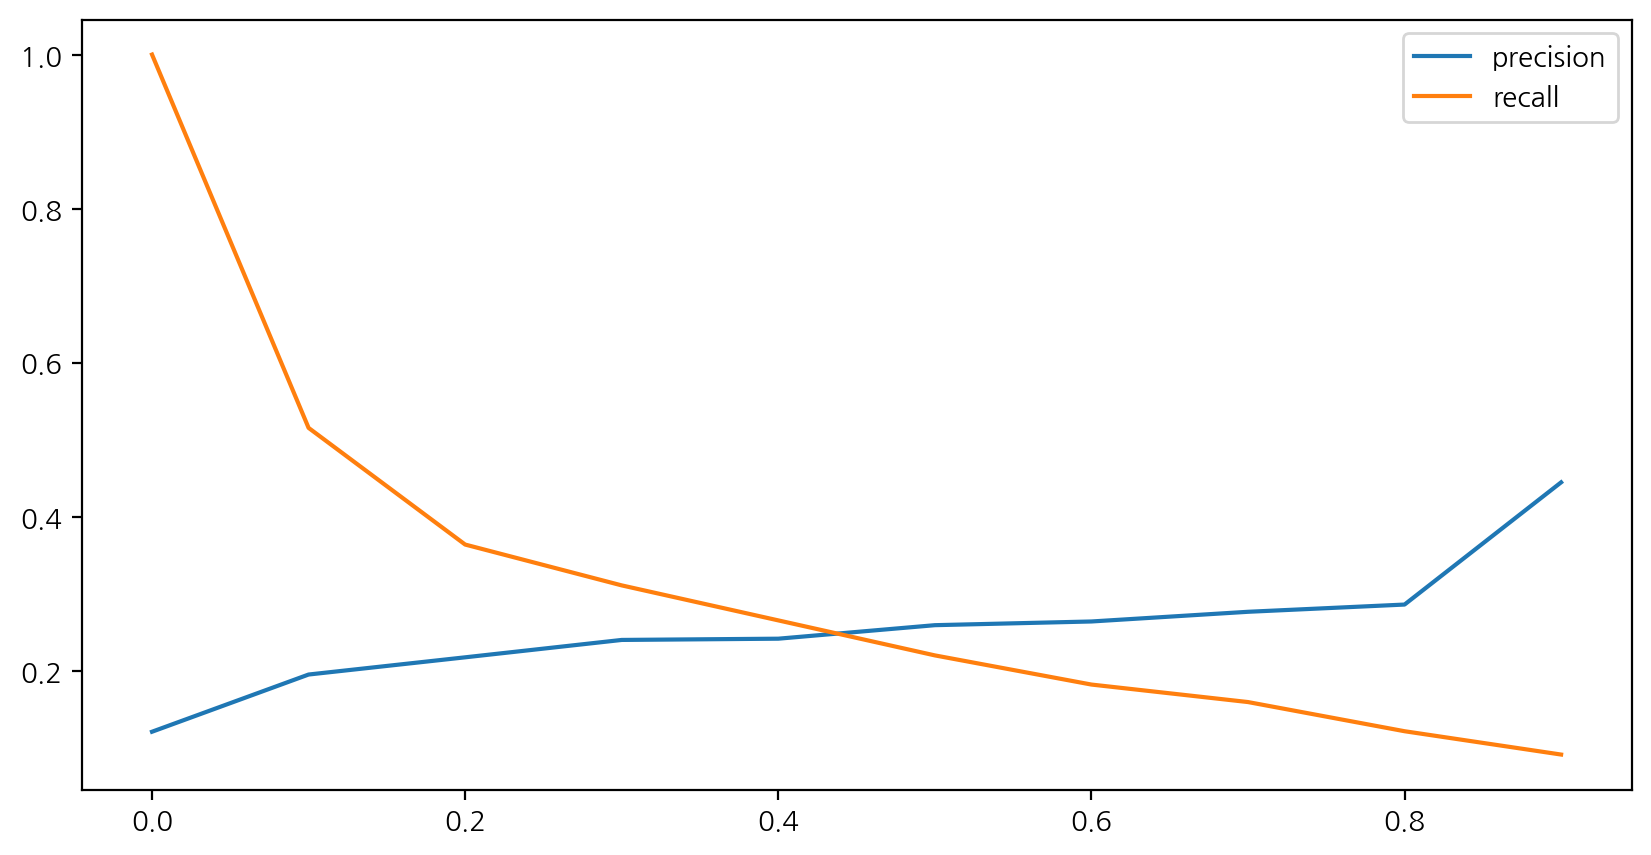

In [ ]:
thres_list = np.arange(0, 1, 0.1)
precision_list = []
recall_list = []

for thres in thres_list:
    prediction = np.where(df_total["평균 P(y=1)의 확률"] > thres, 1, 0)
    precision = precision_score(y, prediction)
    recall = recall_score(y, prediction)

    precision_list.append(precision)
    recall_list.append(recall)

plt.figure(figsize=(10,5))
sns.lineplot(x = thres_list, y = precision_list, label = "precision")
sns.lineplot(x = thres_list, y = recall_list, label = "recall")
plt.legend()
plt.show()

In [ ]:
prediction = np.where(df_total["평균 P(y=1)의 확률"] > 0.5, 1, 0)
df_total["prediction_0.22"] = prediction.reshape(-1,1)

In [ ]:
df_total["actual"] = y

In [ ]:
df_total

,RandomForestClassifier의 P(y=1),XGBClassifier의 P(y=1),LGBMClassifier의 P(y=1),GradientBoostingClassifier의 P(y=1),평균 P(y=1)의 확률,prediction_0.22,actual
인덱스,,,,,,,
0,0.4220000,0.6138915,0.4427163,0.2801526,0.4396901,0,0
1,0.1890000,0.0004890,0.0000000,0.0000464,0.0473838,0,0
2,0.1660000,0.0009745,0.0000007,0.0004379,0.0418533,0,0
3,0.4350000,0.2643545,0.0257790,0.0833464,0.2021200,0,0
4,0.1630000,0.0003969,0.0000000,0.0001444,0.0408853,0,0
...,...,...,...,...,...,...,...
1090,0.2230000,0.0222695,0.0000139,0.0342873,0.0698927,0,0
1091,0.4310000,0.0384635,0.0000750,0.0497525,0.1298228,0,0
1092,0.1380000,0.0025633,0.0000030,0.0002936,0.0352150,0,0


In [ ]:
def confusion(x):
    if (x["actual"] == 1) and (x["prediction_0.22"] == 1):
        return "TP"
    elif (x["actual"] == 0) and (x["prediction_0.22"] == 0):
        return "TN"
    elif (x["actual"] == 1) and (x["prediction_0.22"] == 0):
        return "FN"
    else:
        return "FP"

In [ ]:
confusion_lst = []
for i in df_total.values:
    if (i[4] == 1) and (i[5] == 1):
        confusion_lst.append("TP")
    elif (i[4] == 0) and (i[5] == 0):
        confusion_lst.append("TN")
    elif (i[4] == 1) and (i[5] == 0):
        confusion_lst.append("FP")
    elif (i[4] == 0) and (i[5] == 1):
        confusion_lst.append("FN")

In [ ]:
df_total["confusion"] = confusion_lst

ValueError: ignored

In [ ]:
df_total[df_total["prediction_0.22"] == 1]

In [ ]:
df_total[(df_total["confusion"] == "FP") | (df_total["confusion"] == "TP")].sort_values(by = "평균 P(y=1)의 확률", ascending = False)

In [ ]:
df_total.to_csv("1차필터링.csv", index = False)

In [ ]:
import spacy

sentence = "The first method failed because it caused the wires to melt, but the second method succeeded in bending the wires without causing the same issue."
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence)
s_v_count = 0
token_list = [token.pos_ for token in doc]
if (token_list.count("CCONJ") > 0) and (token_list.count("SCONJ") > 0):
    print("Compound Complex")
elif (token_list.count("SCONJ") > 0): 
    print("Complex")







# return "Compound Complex"

    # else ()
# print(token_list)